Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

importing datasets

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
df_test.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [5]:
df_train = df_train.dropna()

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [8]:
df = df_train + df_test

Plotting the datapoints for training

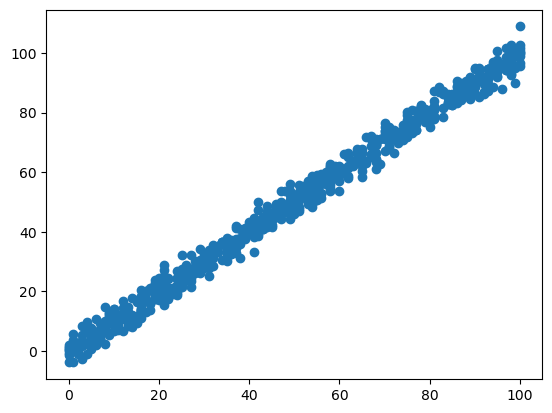

In [9]:
plt.scatter(df_train["x"],df_train["y"])

Finding "r"

In [10]:
def correlation_coefficient(points):
    r = 0
    q = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        r += (x - points["x"].mean()) * (y - points["y"].mean())
        q += math.sqrt(math.pow(x - points["x"].mean(),2)*math.pow(y - points["y"].mean(),2))
    return r / q

In [11]:
r = correlation_coefficient(df_train)
print(r)

0.9998208571353098


Finding ssq

In [12]:
def sample_std(points):
    ssq = 0
    n = len(points["x"])
    for i in range(n):
        x = points.iloc[i].x
        ssq += math.pow(x - points["x"].mean(),2)
    ssq = math.sqrt(ssq)
    return ssq / (n - 1)

In [13]:
ssq = sample_std(df_train)
print(ssq)

1.0959462667077635


Finding ssr

In [14]:
def sample_cov(points):
    ssr = 0
    n = len(points["y"])
    for i in range(n):
        y = points.iloc[i].y
        ssr += math.pow(y - points["y"].mean(),2)
    ssr = math.sqrt(ssr)
    return ssr / (n - 1)

In [15]:
ssr = sample_cov(df_train)
print(ssr)

1.1018001161667859


Creating gradient descent function to find optimal line 

In [16]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        m_gradient += -(2/n)*x*(y-(m_now * x + b_now))
        b_gradient += -(2/n)*(y - (m_now * x * b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b       

In [17]:
m = 0
b = 0
L = 0.0001
epochs = 300
for i in range(epochs):
    m, b = gradient_descent(m, b, df_train, L)

In [18]:
print(m, b)

0.984664876440437 0.9610074150690865


Calculation MSE

In [19]:
def mean_square_error(m, b, points):
    MSE = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        MSE += (y - (m * x + b)) ** 2
    return MSE/float(len(points))

In [20]:
MSE = mean_square_error(m, b, df_train)
print(MSE)

8.15391554048326


Calculating Absolute Error

In [21]:
def absolute_error(m, b, points):
    E = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        E += (y - (m* x + b))
    return E/float(len(points))

In [22]:
E = absolute_error(m, b, df_train)
print(E)

-0.26846883167520563


Plotting the Regression line on Training set and Testing set

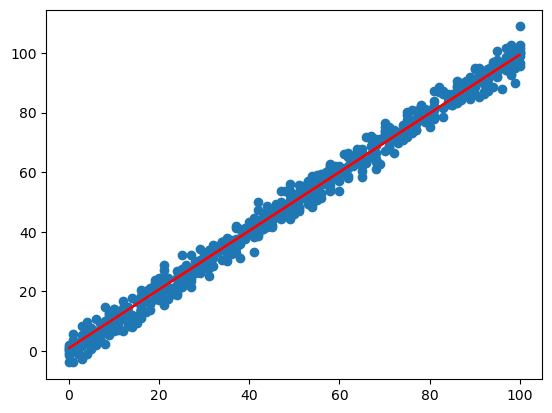

In [23]:
plt.scatter(df_train["x"],df_train["y"])
plt.plot(df_train["x"],(m*df_train["x"])+b,color="red")

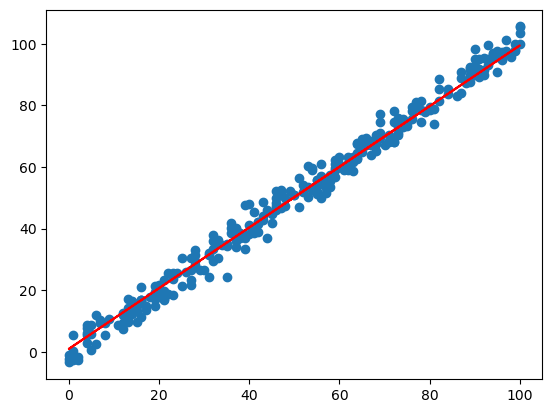

In [24]:
plt.scatter(df_test["x"],df_test["y"])
plt.plot(df_test["x"],(m*df_test["x"])+b,color = "red")

In [25]:
FMSE = mean_square_error(m, b, df_test)
print(FMSE)

9.885004411309799


In [26]:
FE = absolute_error(m, b, df_test)
print(FE)

0.08849709358652127


Using Sklearn Linear Regression model to compare with the gradient descent model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
x = np.array(df_train["x"])
y = np.array(df_train["y"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [30]:
reg.fit(x,y)

LinearRegression()

In [31]:
x_test = np.array(df_test["x"])
y_test = np.array(df_test["y"])
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [32]:
y_pred = reg.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('mae:', mean_absolute_error(y_test,y_pred))
print('mse:', math.sqrt(mean_squared_error(y_test,y_pred)))

mae: 2.4157718500412586
mse: 3.071306268029828


In [34]:
print('mae:', absolute_error(m, b, df_test))
print('mse:', math.sqrt(mean_square_error(m, b, df_test)))

mae: 0.08849709358652127
mse: 3.1440426859872304


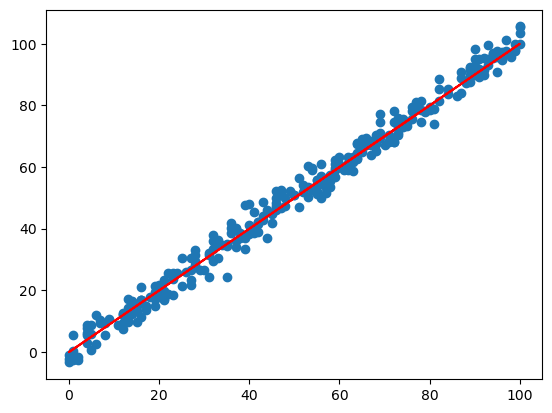

In [35]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, c='r')